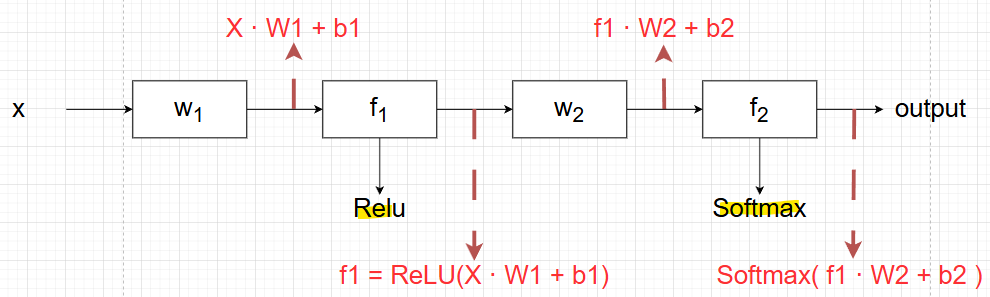

In [20]:
!pip install nnfs
!pip install matplotlib

In [21]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

In [22]:
class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

In [23]:
class Activation_RELU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

In [24]:
class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs

        # Substract max for numerical stability
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))

        # Normalize
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

In [25]:
# Create data

X, y  = spiral_data(samples = 100, classes = 4)

# Dense layer 1
dense1 = Dense(2, 4)

# Activation RELU
activation1 = Activation_RELU()

# Dense layer 2
dense2 = Dense(4, 4)

# Activation Softmax
activation2 = Activation_Softmax()

# Forward dense
dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.25       0.25       0.25       0.25      ]
 [0.24999971 0.25000009 0.25000029 0.24999991]
 [0.25       0.25       0.25       0.25      ]]
